#Instructions for Assignment 2


1.   All the submissions should be attempted individually.
2.   Please submit the assignment either on mycources or mail directly to arbaaz.khan@mail.mcgill.ca

1.   You have the option of either submitted the python notebook (.ipynb) or in .pdf format
2.   Maximum points associated with this assignment = 15.








# Loading the necessary data

In [1]:
! git clone https://github.com/arbi11/YCBS-272.git

fatal: destination path 'YCBS-272' already exists and is not an empty directory.


In [2]:
! ls

sample_data  YCBS-272


In [3]:
cd YCBS-272/

/content/YCBS-272


In [4]:
! ls

Advertising.csv		       Lec_4_6.ipynb
Auto.csv		       Lec_5_Lesson.ipynb
drinks.csv		       Lec_5_Solution.ipynb
fandango_score_comparison.csv  Lec_6_decision_trees.ipynb
indian_liver_patient.csv       nhanes_2015_2016.csv
Lec_2.ipynb		       Quiz_2.ipynb
Lec_2_solution.ipynb	       README.md
Lec_4_1.ipynb		       spamdata.csv
Lec_4_2.ipynb		       tree.dot
Lec_4_3.ipynb		       Tree_Exercise.ipynb
Lec_4_4.ipynb		       YCBS_272_Assignment_1.ipynb
Lec_4_5.ipynb		       YCBS_272_Assignment_2.ipynb


# Loading the data.

The column **'Dataset'** is the target column.


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_frame = pd.read_csv('indian_liver_patient.csv')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 1. Explain what is happening the next line of code
[1 point]

In [0]:
data_frame = pd.get_dummies(data_frame, prefix=['Gender'])

It converts column 'gender' into two columns Gender_Female and Gender_Male so that we can use the data directly.

# 2. Perform basic statistics for the dataset and explain what useful information you extacted from them

Execute and write about atleast 2 different pandas function.

[2 points]

In [8]:
data_frame.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
Gender_Female                 583 non-null uint8
Gender_Male                   583 non-null uint8
dtypes: float64(5), int64(5), uint8(2)
memory usage: 46.8 KB


In [10]:
data_frame.head().T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4
Dataset,1.0,1.00,1.00,1.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7e5fd3cc0>,
      dtype=object)

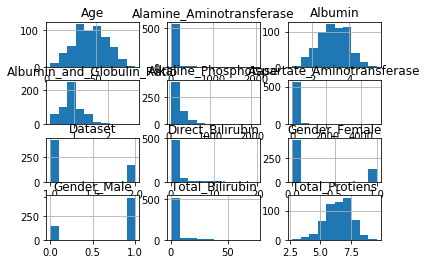

In [11]:
data_frame.hist()

In [12]:
data_frame.var()

Age                             262.110702
Total_Bilirubin                  38.558160
Direct_Bilirubin                  7.887659
Alkaline_Phosphotase          59018.866587
Alamine_Aminotransferase      33350.194438
Aspartate_Aminotransferase    83473.916429
Total_Protiens                    1.178205
Albumin                           0.632850
Albumin_and_Globulin_Ratio        0.102139
Dataset                           0.204747
Gender_Female                     0.184559
Gender_Male                       0.184559
dtype: float64

In [13]:
data_frame.cov()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
Age,262.110702,1.182513,0.342343,316.320097,-256.876967,-93.129211,-3.294309,-3.424924,-1.121938,-1.006195,-0.393388,0.393388
Total_Bilirubin,1.182513,38.558160,15.252836,311.765813,242.746219,426.680305,-0.054591,-1.097871,-0.410540,-0.618728,-0.238195,0.238195
Direct_Bilirubin,0.342343,15.252836,7.887659,160.296509,119.961649,208.978140,-0.000423,-0.510586,-0.180138,-0.312680,-0.121181,0.121181
Alkaline_Phosphotase,316.320097,311.765813,160.296509,59018.866587,5575.844067,11735.360772,-7.519161,-31.975709,-18.227626,-20.321730,2.869693,-2.869693
Alamine_Aminotransferase,-256.876967,242.746219,119.961649,5575.844067,33350.194438,41786.013925,-8.428191,-4.320809,-0.139041,-13.503716,-6.459320,6.459320
Aspartate_Aminotransferase,-93.129211,426.680305,208.978140,11735.360772,41786.013925,83473.916429,-8.042567,-19.603133,-6.488054,-19.862723,-9.971365,9.971365
Total_Protiens,-3.294309,-0.054591,-0.000423,-7.519161,-8.428191,-8.042567,1.178205,0.677028,0.081422,0.017195,0.041558,-0.041558
Albumin,-3.424924,-1.097871,-0.510586,-31.975709,-4.320809,-19.603133,0.677028,0.632850,0.175094,0.058094,0.032057,-0.032057
Albumin_and_Globulin_Ratio,-1.121938,-0.410540,-0.180138,-18.227626,-0.139041,-6.488054,0.081422,0.175094,0.102139,0.023554,0.000469,-0.000469
Dataset,-1.006195,-0.618728,-0.312680,-20.321730,-13.503716,-19.862723,0.017195,0.058094,0.023554,0.204747,0.016021,-0.016021


In [14]:
data_frame.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131,0.003424,-0.003424
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000,0.082416,-0.082416


from the correlation coefficient it seems as if the column Dataset doesn't have a direct conncetion with other columns.
However, at least Total_Bilirubin and Direct_Bilirubin have more influence than others.

# 3.1 Generate a box plot showing the effect of age on Total_Protiens column
[1 point]

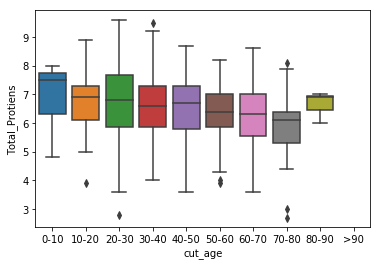

In [15]:
data2=data_frame.copy()
listbins=[0,10,20,30,40,50,60,70,80,90,1000]
listlabels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','>90']
data2['cut_age']=pd.cut(data2.Age,labels=listlabels,bins=listbins,include_lowest=True)
sns.boxplot(data2['cut_age'],data2['Total_Protiens'])

# 3.2 Extend the above box plot to show the effect of gender too along with age on 'Total_protein' column

[2 point]

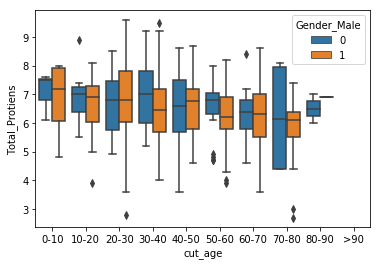

In [16]:
sns.boxplot(x='cut_age',y='Total_Protiens',hue='Gender_Male',data=data2)

# 4. Partition the data into 'Train' and 'Test' set

Ratio: 90:10

[1 point]

In [0]:
data2=data2.dropna()
Y=data2['Dataset']
X=data2.drop('Dataset',axis=1)
X=X.drop('cut_age',axis=1)
X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size = 0.1, random_state=1)

# 5.1 Train a model (Decision Tree) on the 'Train' dataset

[2 points]

In [18]:
model=DecisionTreeClassifier(max_depth=4,random_state=1,min_samples_leaf=6)
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

# 5.2 Predict the outcome for the data in 'Test' set

[1 point]

In [0]:
y_predict=model.predict(X_test)

# 5.3 Compute the accuracy over both the 'Train' & 'Test' set

[1 point]

In [20]:
print("accuracy over the test set:" ,end=' ')
print(accuracy_score(Y_test,y_predict))

accuracy over the test set: 0.7586206896551724


In [21]:
Y_predict=model.predict(X)
print("accuracy over both the test set and the train set" ,end=' ')
print(accuracy_score(Y,Y_predict))

accuracy over both the test set and the train set 0.7236614853195165


# 5.4 Generate the confusion matrix.

Explain each element in the confusion matrix.

How will you calculate **Precision** and **Recall**? Explain their significance.

[2 points]

In [22]:
cm = pd.DataFrame(confusion_matrix(Y_test, y_predict).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

     No  Yes
No   31    5
Yes   9   13


 precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. Both precision and recall are therefore based on an understanding and measure of relevance. 

 P=TP/(TP+FP)

 R=TP/(TP+FN)

# 5.5 Plot your decision tree

[1 point]

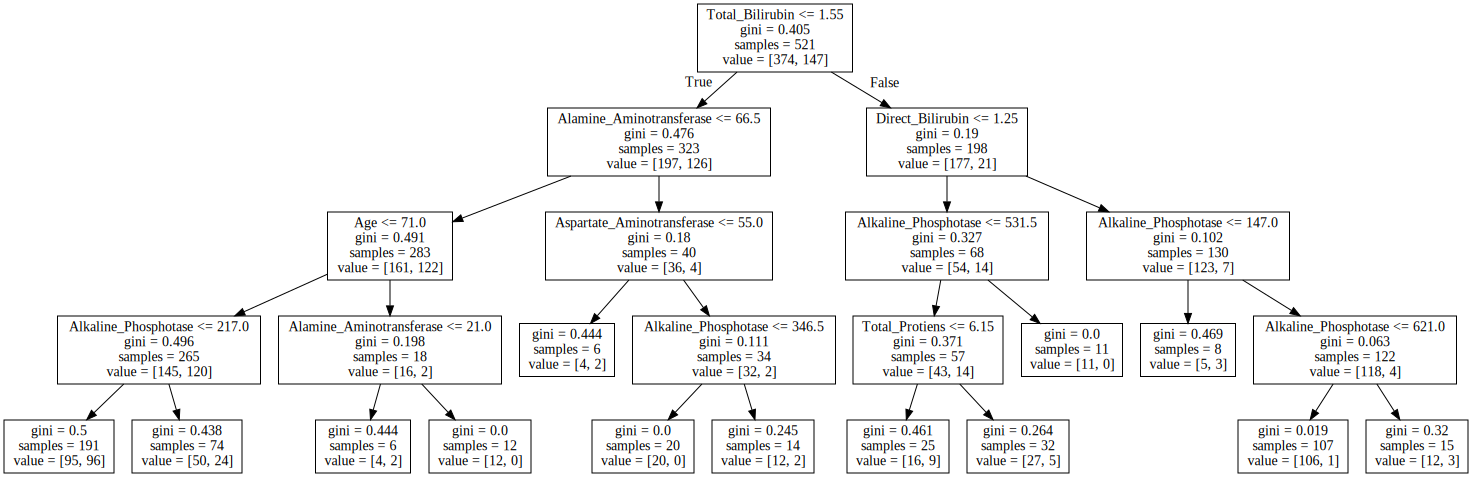

In [23]:
export_graphviz(model, 
                out_file = "tree.dot", 
                feature_names = X_train.columns,
                )

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 5.6 Can you identify the most important feature in your train dataset

[1 point]

Total_Bilirubin is the most important feature beacuse it can identify the data into the most seperate two sets.

# Bonus: How can you improve the efficiency of your prediction

Hint: Bagging Classifier

If you have lot of free time:

*! pip install xgboost*

*import xgboost as xgb*

[XGBoost](https://xgboost.readthedocs.io/en/latest/)

XGBoost is a gradienbt based Boosting Tree Classifier. 


Bonus marks for achieving accuracy over 0.74

In [24]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [25]:
classification_tree_spam = DecisionTreeClassifier(max_depth=4,random_state=1,min_samples_leaf=6)
bag = BaggingClassifier(classification_tree_spam, n_estimators=21, \
                        random_state=1,verbose=True)
bag.fit(X_train, Y_train)

y_hat = bag.predict(X_test)
score=accuracy_score(Y_test, y_hat)
print(score)

0.7586206896551724


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [26]:
model2 = XGBClassifier(max_depth=6,n_estimators=36)
model2.fit(X_train, Y_train)
y_hat = model2.predict(X_test)
accuracy_score(Y_test, y_hat)

0.7758620689655172

In [27]:
accuracy_score(Y,model2.predict(X))

0.9050086355785838